# **Import Library**

In [1]:
pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425344 sha256=17990d3c3ea7e259948f218980e53fdbe45977f28cadc6bbc987cdb5c0ea5760
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [2]:
import pyspark

spark = pyspark.sql.SparkSession.builder.getOrCreate() # PySparkı tanımlama

from pyspark.sql import SparkSession
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler

from pyspark.sql.functions import regexp_extract
from pyspark.sql.functions import col, lit, sum as spark_sum, when

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# **Get Data**

In [3]:
train = spark.read.csv('train_arabam.csv', header='True', inferSchema='True')
train = train.drop('_c0')
test = spark.read.csv('test_arabam.csv', header='True', inferSchema='True')
test = test.drop('_c0')

In [4]:
type(train)

pyspark.sql.dataframe.DataFrame

In [5]:
type(test)

pyspark.sql.dataframe.DataFrame

In [6]:
train

DataFrame[price_try: string, make: string, series: string, model: string, year: string, km: string, transmission: string, fuel: string, body_type: string, warranty: string, from_: string, wheel_drive: string, cylinder_number: int, torque_nm: string, engine_capacity_cc: string, engine_power_hp: string, max_power_rpm: string, min_power_rpm: string, acceleration_0to100_sec: string, max_speed_kmh: string, average_fuel_consumption_lt: string, painted_changed: string]

In [7]:
test

DataFrame[price_try: string, make: string, series: string, model: string, year: string, km: string, transmission: string, fuel: string, body_type: string, warranty: string, from_: string, wheel_drive: string, cylinder_number: int, torque_nm: string, engine_capacity_cc: string, engine_power_hp: string, max_power_rpm: string, min_power_rpm: string, acceleration_0to100_sec: string, max_speed_kmh: string, average_fuel_consumption_lt: string, painted_changed: string]

In [8]:
train.show() # PySpark DataFrame

+---------+---------------+--------+--------------------+----+------+-------------+------------+-----------+-------------+----------+------------+---------------+---------+------------------+---------------+-------------+-------------+-----------------------+-------------+---------------------------+-------------------+
|price_try|           make|  series|               model|year|    km| transmission|        fuel|  body_type|     warranty|     from_| wheel_drive|cylinder_number|torque_nm|engine_capacity_cc|engine_power_hp|max_power_rpm|min_power_rpm|acceleration_0to100_sec|max_speed_kmh|average_fuel_consumption_lt|    painted_changed|
+---------+---------------+--------+--------------------+----+------+-------------+------------+-----------+-------------+----------+------------+---------------+---------+------------------+---------------+-------------+-------------+-----------------------+-------------+---------------------------+-------------------+
|   364950|        Peugeot|     30

In [9]:
test.show() # PySpark DataFrame

+---------+---------------+-------+------------------+----+------+-------------+------------+-----------+-------------+----------+------------+---------------+---------+------------------+---------------+-------------+-------------+-----------------------+-------------+---------------------------+-------------------+
|price_try|           make| series|             model|year|    km| transmission|        fuel|  body_type|     warranty|     from_| wheel_drive|cylinder_number|torque_nm|engine_capacity_cc|engine_power_hp|max_power_rpm|min_power_rpm|acceleration_0to100_sec|max_speed_kmh|average_fuel_consumption_lt|    painted_changed|
+---------+---------------+-------+------------------+----+------+-------------+------------+-----------+-------------+----------+------------+---------------+---------+------------------+---------------+-------------+-------------+-----------------------+-------------+---------------------------+-------------------+
|   700000|           Ford|  Focus|      1.

In [10]:
train.printSchema() # Pandastaki info() fonksiyonuyla benzer

root
 |-- price_try: string (nullable = true)
 |-- make: string (nullable = true)
 |-- series: string (nullable = true)
 |-- model: string (nullable = true)
 |-- year: string (nullable = true)
 |-- km: string (nullable = true)
 |-- transmission: string (nullable = true)
 |-- fuel: string (nullable = true)
 |-- body_type: string (nullable = true)
 |-- warranty: string (nullable = true)
 |-- from_: string (nullable = true)
 |-- wheel_drive: string (nullable = true)
 |-- cylinder_number: integer (nullable = true)
 |-- torque_nm: string (nullable = true)
 |-- engine_capacity_cc: string (nullable = true)
 |-- engine_power_hp: string (nullable = true)
 |-- max_power_rpm: string (nullable = true)
 |-- min_power_rpm: string (nullable = true)
 |-- acceleration_0to100_sec: string (nullable = true)
 |-- max_speed_kmh: string (nullable = true)
 |-- average_fuel_consumption_lt: string (nullable = true)
 |-- painted_changed: string (nullable = true)



In [11]:
test.printSchema() # Pandastaki info() fonksiyonuyla benzer

root
 |-- price_try: string (nullable = true)
 |-- make: string (nullable = true)
 |-- series: string (nullable = true)
 |-- model: string (nullable = true)
 |-- year: string (nullable = true)
 |-- km: string (nullable = true)
 |-- transmission: string (nullable = true)
 |-- fuel: string (nullable = true)
 |-- body_type: string (nullable = true)
 |-- warranty: string (nullable = true)
 |-- from_: string (nullable = true)
 |-- wheel_drive: string (nullable = true)
 |-- cylinder_number: integer (nullable = true)
 |-- torque_nm: string (nullable = true)
 |-- engine_capacity_cc: string (nullable = true)
 |-- engine_power_hp: string (nullable = true)
 |-- max_power_rpm: string (nullable = true)
 |-- min_power_rpm: string (nullable = true)
 |-- acceleration_0to100_sec: string (nullable = true)
 |-- max_speed_kmh: string (nullable = true)
 |-- average_fuel_consumption_lt: string (nullable = true)
 |-- painted_changed: string (nullable = true)



In [12]:
train.describe().show()

+-------+-----------------+------------------+------------------+-----------------+-----------------+------------------+------------+-----+-------------+----------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------------+-----------------+---------------------------+---------------+
|summary|        price_try|              make|            series|            model|             year|                km|transmission| fuel|    body_type|  warranty|             from_|      wheel_drive|   cylinder_number|         torque_nm|engine_capacity_cc|   engine_power_hp|     max_power_rpm|     min_power_rpm|acceleration_0to100_sec|    max_speed_kmh|average_fuel_consumption_lt|painted_changed|
+-------+-----------------+------------------+------------------+-----------------+-----------------+------------------+------------+-----+-------------+----------+------------------+-------------

In [13]:
test.describe().show()

+-------+------------------+----------+-----------------+------------------+------------------+------------------+------------+-----+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+------------------+-----------------+-----------------+-----------------------+------------------+---------------------------+---------------+
|summary|         price_try|      make|           series|             model|              year|                km|transmission| fuel|         body_type|          warranty|            from_|       wheel_drive|   cylinder_number|         torque_nm|engine_capacity_cc|   engine_power_hp|    max_power_rpm|    min_power_rpm|acceleration_0to100_sec|     max_speed_kmh|average_fuel_consumption_lt|painted_changed|
+-------+------------------+----------+-----------------+------------------+------------------+------------------+------------+-----+------------------+------------------+-------------

# **Pre Processing**

## **Convert Data Type**

In [14]:
train = train.withColumn("km", col("km").cast("integer"))
train = train.withColumn("cylinder_number", col("cylinder_number").cast("float"))
train = train.withColumn("torque_nm", col("torque_nm").cast("float"))
train = train.withColumn("max_power_rpm", col("max_power_rpm").cast("float"))
train = train.withColumn("min_power_rpm", col("min_power_rpm").cast("float"))
train = train.withColumn("max_speed_kmh", col("max_speed_kmh").cast("float"))



In [15]:

test = test.withColumn("km", col("km").cast("integer"))
test = test.withColumn("cylinder_number", col("cylinder_number").cast("float"))
test = test.withColumn("torque_nm", col("torque_nm").cast("float"))
test = test.withColumn("max_power_rpm", col("max_power_rpm").cast("float"))
test = test.withColumn("min_power_rpm", col("min_power_rpm").cast("float"))
test = test.withColumn("max_speed_kmh", col("max_speed_kmh").cast("float"))


## **Corr()**

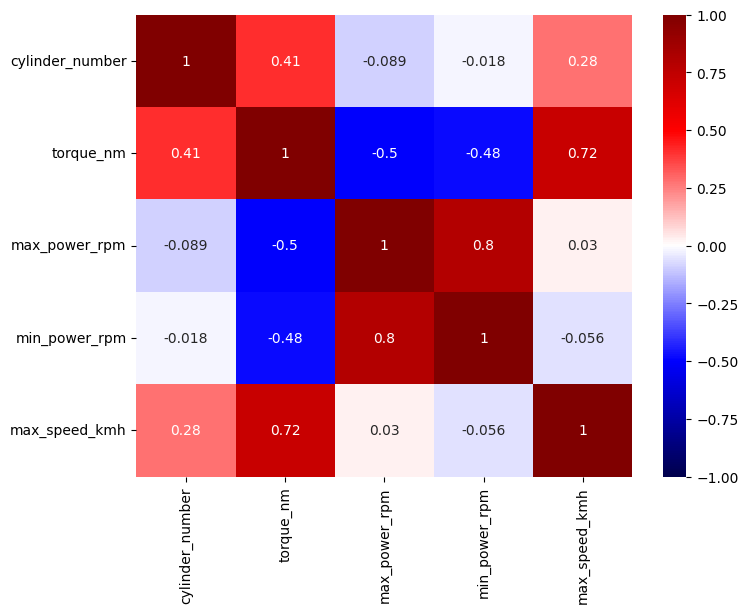

In [16]:
# all number columns
num_columns = [col_name for col_name, data_type in train.dtypes if data_type == "integer" or data_type == "float"]

# drop na rows
train = train.na.drop()

# concat all number columns with VectorAssembler
assembler = VectorAssembler(inputCols=num_columns, outputCol="features")
assembled_train = assembler.transform(train)

# corr() calculate
correlation_matrix = Correlation.corr(assembled_train, "features").head()[0]

# Convert the correlation matrix to a Pandas DataFrame
correlation_matrix_df = pd.DataFrame(correlation_matrix.toArray(), columns=num_columns, index=num_columns)

# Heatmap
plt.figure(figsize=[8, 6])
sns.heatmap(correlation_matrix_df, cmap="seismic", annot=True, vmin=-1, vmax=1)
plt.show()


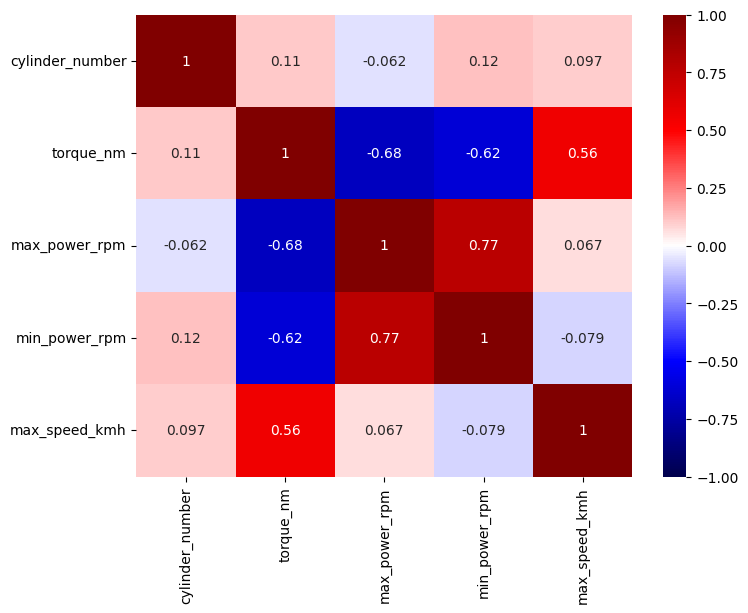

In [17]:
# all number columns
num_columns = [col_name for col_name, data_type in test.dtypes if data_type == "integer" or data_type == "float"]

# drop na rows
test = test.na.drop()

# concat all number columns with VectorAssembler
assembler = VectorAssembler(inputCols=num_columns, outputCol="features")
assembled_train = assembler.transform(test)

# corr() calculate
correlation_matrix = Correlation.corr(assembled_train, "features").head()[0]

# Convert the correlation matrix to a Pandas DataFrame
correlation_matrix_df = pd.DataFrame(correlation_matrix.toArray(), columns=num_columns, index=num_columns)

# Heatmap
plt.figure(figsize=[8, 6])
sns.heatmap(correlation_matrix_df, cmap="seismic", annot=True, vmin=-1, vmax=1)
plt.show()


# **engine_capacity_cc column**

## **Get the unique values ​​of the 'engine_capacity_cc' column**


In [18]:
# Get the unique values ​​of the 'engine_capacity_cc' column
unique_values = train.select("engine_capacity_cc").distinct().collect()

# Get Result of Spark DataFrame
unique_values_list = [row["engine_capacity_cc"] for row in unique_values]
unique_values_list

['1956',
 '2720',
 '1496',
 '1318',
 '1296',
 '1984',
 '2967',
 '1598',
 '1193',
 '2979',
 '1592',
 '1398',
 '3982',
 '999',
 '1798',
 '1995',
 '1580',
 '3518',
 '1339',
 '1796',
 '1490',
 '2494',
 '1968',
 '1489',
 '1396',
 '1422',
 '1149',
 '1461',
 '1397',
 '2143',
 '1206',
 '1499',
 '1199',
 '998',
 '1950',
 '1399',
 '1997',
 '1591',
 '1248',
 '1595',
 '1560',
 '1582',
 '1597',
 '1599',
 '1390',
 '1581',
 '1332',
 '1368',
 '1596',
 '1495',
 '1896',
 '1859',
 '1587',
 '1590',
 '1229',
 '1242',
 '1360',
 '1240',
 '1998',
 '1086',
 '2993',
 '1198',
 '1395',
 '1197',
 '1388',
 '1364',
 '1991',
 '1493',
 '1498',
 '1324',
 '898',
 '1329']

In [19]:
# Get the unique values ​​of the 'engine_capacity_cc' column
unique_values = test.select("engine_capacity_cc").distinct().collect()

# Get Result of Spark DataFrame
unique_values_list = [row["engine_capacity_cc"] for row in unique_values]
unique_values_list

['1496',
 '1598',
 '1398',
 '999',
 '1798',
 '1995',
 '2148',
 '1339',
 '1796',
 '1490',
 '1968',
 '1489',
 '1396',
 '1422',
 '1149',
 '1461',
 '1499',
 '1199',
 '998',
 '1399',
 '1997',
 '1591',
 '1248',
 '1595',
 '1560',
 '1582',
 '1599',
 '1597',
 '1581',
 '1390',
 '1332',
 '1368',
 '1596',
 '1896',
 '1895',
 '1590',
 '1229',
 '1242',
 '1360',
 '1395',
 '1197',
 '1388',
 '1364',
 '1586',
 '1991',
 '1493',
 '1498',
 '898',
 '1329']

## **regexp_extract() - PySpark SQL functions**

In [20]:
#Use PySpark SQL functions to extract numeric values ​​in a 'engine_capacity_cc' column
train = train.withColumn("engine_capacity_cc", regexp_extract("engine_capacity_cc", r"\d+", 0).cast("int"))

# Result
train.show()


#In this example, the numeric values ​​in a specific column are extracted using the regexp_extract function.
#Regular expression (r"\d+") used here refers to numeric expressions.
#The resulting numbers are then converted to the integer data type using the cast("int") function.
#After performing these operations, you will see that the column now contains only numeric values ​​when displaying the DataFrame.

+---------+----------+--------+--------------------+----+------+-------------+------------+-----------+-------------+----------+------------+---------------+---------+------------------+---------------+-------------+-------------+-----------------------+-------------+---------------------------+-------------------+
|price_try|      make|  series|               model|year|    km| transmission|        fuel|  body_type|     warranty|     from_| wheel_drive|cylinder_number|torque_nm|engine_capacity_cc|engine_power_hp|max_power_rpm|min_power_rpm|acceleration_0to100_sec|max_speed_kmh|average_fuel_consumption_lt|    painted_changed|
+---------+----------+--------+--------------------+----+------+-------------+------------+-----------+-------------+----------+------------+---------------+---------+------------------+---------------+-------------+-------------+-----------------------+-------------+---------------------------+-------------------+
|   769950|       BMW|5 Serisi|        520d Premi

In [21]:
#Use PySpark SQL functions to extract numeric values ​​in a 'engine_capacity_cc' column
test = test.withColumn("engine_capacity_cc", regexp_extract("engine_capacity_cc", r"\d+", 0).cast("int"))

# Result
test.show()


+---------+----------+----------+--------------------+----+------+-------------+------------+-----------+-------------+----------+------------+---------------+---------+------------------+---------------+-------------+-------------+-----------------------+-------------+---------------------------+-------------------+
|price_try|      make|    series|               model|year|    km| transmission|        fuel|  body_type|     warranty|     from_| wheel_drive|cylinder_number|torque_nm|engine_capacity_cc|engine_power_hp|max_power_rpm|min_power_rpm|acceleration_0to100_sec|max_speed_kmh|average_fuel_consumption_lt|    painted_changed|
+---------+----------+----------+--------------------+----+------+-------------+------------+-----------+-------------+----------+------------+---------------+---------+------------------+---------------+-------------+-------------+-----------------------+-------------+---------------------------+-------------------+
|   750000|      Ford|     Focus|  1.6 Ti-V

## **isNull()**

In [22]:
#Find the number of missing values ​​in the engine_capacity_cc column
train.select(spark_sum(when(col("engine_capacity_cc").isNull(), 1).otherwise(0)).alias("engine_capacity_cc")).show()

+------------------+
|engine_capacity_cc|
+------------------+
|                 0|
+------------------+



In [23]:
#Find the number of missing values ​​in the engine_capacity_cc column
test.select(spark_sum(when(col("engine_capacity_cc").isNull(), 1).otherwise(0)).alias("engine_capacity_cc")).show()

+------------------+
|engine_capacity_cc|
+------------------+
|                 0|
+------------------+



## **Fill in missing values**


In [24]:
engine_capacity_dict = {
    '1.2 Twinport Enjoy': '1200',
    'Ultimate': '1520',
    '1.4 Authentique': '1400',
    '1.4 TSi Highline': '1400',
    '135 L': '1300',
    '1.6': '1600',
    '1.4 TDCi Comfort': '1400',
    '1.2 Trendline': '1200',
    '2.4 D5 VIP': '2400',
    '1.6 EX Advance': '1600',
    '1.4 RNA': '1400',
    '1.4 X-Line': '1400',
    '2.0 HDi ST': '2000',
    'Grande 1.4 Fire Active': '1400',
    '1.6 Europa RT': '1600',
    '1.6 i-VTEC Eco Executive': '1600',
    '1.6 XEi': '1600',
    '500 1.3 Mjet Lounge': '1300',
    '1.6 TDCi Titanium': '1600',
    '4S Performance Plus': '1520'
}

In [25]:
#Fill in missing values ​​using engine_capacity_dict
for model, engine_capacity in engine_capacity_dict.items():
    train = train.withColumn("engine_capacity_cc", when((col("model") == model) & (col("engine_capacity_cc").isNull()), lit(engine_capacity)).otherwise(col("engine_capacity_cc")))

train.show()

+---------+----------+--------+--------------------+----+------+-------------+------------+-----------+-------------+----------+------------+---------------+---------+------------------+---------------+-------------+-------------+-----------------------+-------------+---------------------------+-------------------+
|price_try|      make|  series|               model|year|    km| transmission|        fuel|  body_type|     warranty|     from_| wheel_drive|cylinder_number|torque_nm|engine_capacity_cc|engine_power_hp|max_power_rpm|min_power_rpm|acceleration_0to100_sec|max_speed_kmh|average_fuel_consumption_lt|    painted_changed|
+---------+----------+--------+--------------------+----+------+-------------+------------+-----------+-------------+----------+------------+---------------+---------+------------------+---------------+-------------+-------------+-----------------------+-------------+---------------------------+-------------------+
|   769950|       BMW|5 Serisi|        520d Premi

In [26]:
train.printSchema()

root
 |-- price_try: string (nullable = true)
 |-- make: string (nullable = true)
 |-- series: string (nullable = true)
 |-- model: string (nullable = true)
 |-- year: string (nullable = true)
 |-- km: integer (nullable = true)
 |-- transmission: string (nullable = true)
 |-- fuel: string (nullable = true)
 |-- body_type: string (nullable = true)
 |-- warranty: string (nullable = true)
 |-- from_: string (nullable = true)
 |-- wheel_drive: string (nullable = true)
 |-- cylinder_number: float (nullable = true)
 |-- torque_nm: float (nullable = true)
 |-- engine_capacity_cc: string (nullable = true)
 |-- engine_power_hp: string (nullable = true)
 |-- max_power_rpm: float (nullable = true)
 |-- min_power_rpm: float (nullable = true)
 |-- acceleration_0to100_sec: string (nullable = true)
 |-- max_speed_kmh: float (nullable = true)
 |-- average_fuel_consumption_lt: string (nullable = true)
 |-- painted_changed: string (nullable = true)



## **Convert Data Type**

In [27]:
train.select("engine_capacity_cc").collect()[300][0]

'1598'

In [28]:
train = train.withColumn("engine_capacity_cc", col("engine_capacity_cc").cast("integer"))

#**cylinder_nuber column**

## **Get the unique values ​​of the 'cylinder_capacity_cc' column**




In [86]:
# Get the unique values ​​of the 'engine_capacity_cc' column
unique_values = train.select("cylinder_number").distinct().collect()

# Get Result of Spark DataFrame
unique_values_list = [row["cylinder_number"] for row in unique_values]
unique_values_list

[6, 3, 5, 4, 8]

## **Filter rows**

In [30]:
# Filter rows with cylinder_number column 8.0
filtered_train = train.filter(col("cylinder_number") == 8.0)

# Find the minimum value of the engine_capacity_cc column
min_engine_capacity = filtered_train.agg({"engine_capacity_cc": "min"}).collect()[0][0]

# Result
min_engine_capacity

3982

In [31]:
# Filter rows with cylinder_number column 6.0
filtered_train = train.filter(col("cylinder_number") == 6.0)
# Filter rows with cylinder_number column
# Find the minimum value of the engine_capacity_cc column
min_engine_capacity = filtered_train.agg({"engine_capacity_cc": "min"}).collect()[0][0]

# Result
min_engine_capacity

1991

In [32]:
# Filter rows with cylinder_number column 5.0
filtered_train = train.filter(col("cylinder_number") == 5.0)

# Find the minimum value of the engine_capacity_cc column
min_engine_capacity = filtered_train.agg({"engine_capacity_cc": "min"}).collect()[0][0]

# Result
min_engine_capacity

1998

In [33]:
# Filter rows with cylinder_number column 4.0
filtered_train = train.filter(col("cylinder_number") == 4.0)

# Find the minimum value of the engine_capacity_cc column
min_engine_capacity = filtered_train.agg({"engine_capacity_cc": "min"}).collect()[0][0]

# Result
min_engine_capacity

1086

In [34]:
# Filter rows with cylinder_number column 3.0
filtered_train = train.filter(col("cylinder_number") == 3.0)

# Find the minimum value of the engine_capacity_cc column
min_engine_capacity = filtered_train.agg({"engine_capacity_cc": "min"}).collect()[0][0]

# Result
min_engine_capacity

898

In [35]:
# Create cylinder_number column
train = train.withColumn("new_cylinder_number",
                         when(col("engine_capacity_cc") >= 2997, 8)
                         .when(col("engine_capacity_cc") >= 1991, 6)
                         .when(col("engine_capacity_cc") >= 1984, 5)
                         .when(col("engine_capacity_cc") >= 998, 4)
                         .when(col("engine_capacity_cc") >= 898, 3)
                         .otherwise(col("cylinder_number")))

#Update the cylinder_number column
train = train.withColumn("cylinder_number", col("new_cylinder_number")).drop("new_cylinder_number")

# Result
train.show()


+---------+----------+--------+--------------------+----+------+-------------+------------+-----------+-------------+----------+------------+---------------+---------+------------------+---------------+-------------+-------------+-----------------------+-------------+---------------------------+-------------------+
|price_try|      make|  series|               model|year|    km| transmission|        fuel|  body_type|     warranty|     from_| wheel_drive|cylinder_number|torque_nm|engine_capacity_cc|engine_power_hp|max_power_rpm|min_power_rpm|acceleration_0to100_sec|max_speed_kmh|average_fuel_consumption_lt|    painted_changed|
+---------+----------+--------+--------------------+----+------+-------------+------------+-----------+-------------+----------+------------+---------------+---------+------------------+---------------+-------------+-------------+-----------------------+-------------+---------------------------+-------------------+
|   769950|       BMW|5 Serisi|        520d Premi

In [36]:
train.select("cylinder_number").collect()[330][0]

4.0

## **Convert Data Type**

In [37]:
train = train.withColumn("cylinder_number", col("cylinder_number").cast("integer"))


## **isNull()**

In [38]:
# Find the number of missing values ​​in the engine_capacity_cc column
train.select(spark_sum(when(col("cylinder_number").isNull(), 1).otherwise(0)).alias("cylinder_number")).show()

+---------------+
|cylinder_number|
+---------------+
|              0|
+---------------+



# **torque_nm column**

## **Get the unique values ​​of the 'cylinder_capacity_cc' column**


In [39]:
# Get the unique values ​​of the 'torque_nm' column
unique_values = train.select("torque_nm").distinct().collect()

# Get Result of Spark DataFrame
unique_values_list = [row["torque_nm"] for row in unique_values]
unique_values_list

[550.0,
 107.0,
 500.0,
 270.0,
 143.0,
 285.0,
 435.0,
 360.0,
 101.0,
 132.0,
 144.0,
 105.0,
 190.0,
 180.0,
 117.0,
 102.0,
 175.0,
 255.0,
 118.0,
 134.0,
 350.0,
 320.0,
 254.0,
 110.0,
 116.0,
 97.0,
 124.0,
 148.0,
 151.0,
 225.0,
 262.0,
 240.0,
 380.0,
 152.0,
 186.0,
 128.0,
 250.0,
 340.0,
 123.0,
 120.0,
 260.0,
 133.0,
 216.0,
 146.0,
 400.0,
 154.0,
 185.0,
 700.0,
 200.0,
 127.0,
 140.0,
 172.0,
 170.0,
 150.0,
 210.0,
 220.0,
 450.0,
 370.0,
 159.0,
 121.0,
 93.0,
 600.0,
 95.0,
 147.0,
 112.0,
 204.0,
 145.0,
 205.0,
 115.0,
 235.0,
 138.0,
 221.0,
 104.0,
 136.0,
 130.0,
 290.0,
 142.0,
 475.0,
 157.0,
 160.0,
 156.0,
 300.0,
 520.0,
 131.0,
 230.0,
 135.0,
 125.0,
 280.0,
 155.0,
 114.0,
 184.0,
 153.0]

## **Fill in missing values**

In [40]:
# Create torque_nm column
train = train.withColumn("new_torque_nm",
                          when(col("engine_capacity_cc") >= 6000, 600)
                         .when(col("engine_capacity_cc") >= 5000, 500)
                         .when(col("engine_capacity_cc") >= 2500, 250)
                         .when(col("engine_capacity_cc") >= 2400, 240)
                         .when(col("engine_capacity_cc") >= 1990, 200)
                         .when(col("engine_capacity_cc") >= 1780, 180)
                         .when(col("engine_capacity_cc") >= 1560, 150)
                         .when(col("engine_capacity_cc") >= 1380, 140)
                         .when(col("engine_capacity_cc") >= 1280, 130)
                         .when(col("engine_capacity_cc") >= 1200, 120)
                         .when(col("engine_capacity_cc") >= 1100, 110)
                         .otherwise(col("torque_nm")))

# Update torque_nm column
train = train.withColumn("torque_nm", col("new_torque_nm")).drop("new_torque_nm")

# Result
train.show()

+---------+----------+--------+--------------------+----+------+-------------+------------+-----------+-------------+----------+------------+---------------+---------+------------------+---------------+-------------+-------------+-----------------------+-------------+---------------------------+-------------------+
|price_try|      make|  series|               model|year|    km| transmission|        fuel|  body_type|     warranty|     from_| wheel_drive|cylinder_number|torque_nm|engine_capacity_cc|engine_power_hp|max_power_rpm|min_power_rpm|acceleration_0to100_sec|max_speed_kmh|average_fuel_consumption_lt|    painted_changed|
+---------+----------+--------+--------------------+----+------+-------------+------------+-----------+-------------+----------+------------+---------------+---------+------------------+---------------+-------------+-------------+-----------------------+-------------+---------------------------+-------------------+
|   769950|       BMW|5 Serisi|        520d Premi

In [41]:
train.select("torque_nm").collect()[34][0]

150.0

## **Convert Data Type**

In [42]:
train = train.withColumn("torque_nm", col("torque_nm").cast("integer"))


## **isNull()**

In [43]:
# Find the number of missing values ​​in the torque_nm column
train.select(spark_sum(when(col("torque_nm").isNull(), 1).otherwise(0)).alias("torque_nm")).show()

+---------+
|torque_nm|
+---------+
|        0|
+---------+



# **engine_power_hp column**

## **Get the unique values ​​of the 'engine_power_hp' column**


In [44]:
# Get the unique values ​​of the 'engine_power_hp' column
unique_values = train.select("engine_power_hp").distinct().collect()

# Get Result of Spark DataFrame
unique_values_list = [row["engine_power_hp"] for row in unique_values]
unique_values_list

['125',
 '124',
 '155',
 '132',
 '69',
 '112',
 '87',
 '64',
 '113',
 '250',
 '160',
 '184',
 '85',
 '126 - 150 HP',
 '71',
 '98',
 '99',
 '110',
 '107',
 '96',
 '163',
 '100',
 '70',
 '218',
 '75',
 '140',
 '131',
 '126',
 '286',
 '120',
 '130',
 '207',
 '381',
 '147',
 '77',
 '136',
 '177',
 '90',
 '68',
 '194',
 '128',
 '102',
 '111',
 '95',
 '93',
 '103',
 '156',
 '190',
 '115',
 '82',
 '231',
 '122',
 '86',
 '204',
 '81',
 '114',
 '150',
 '170',
 '178',
 '240',
 '180',
 '97',
 '106',
 '158',
 '84',
 '143',
 '151 - 175 HP',
 '116',
 '152',
 '88',
 '105',
 '142',
 '127',
 '431',
 '225',
 '65',
 '265',
 '121',
 '252',
 '83',
 '109',
 '66',
 '91',
 '94',
 '469',
 '72',
 '74',
 '129',
 '76',
 '192',
 '80']

## **regexp_extract() - PySpark SQL functions**

In [45]:
#Use PySpark SQL functions to extract numeric values ​​in a 'engine_power_hp' column
train = train.withColumn("engine_power_hp", regexp_extract("engine_power_hp", r"\d+", 0).cast("int"))

# Result
train.show()



+---------+----------+--------+--------------------+----+------+-------------+------------+-----------+-------------+----------+------------+---------------+---------+------------------+---------------+-------------+-------------+-----------------------+-------------+---------------------------+-------------------+
|price_try|      make|  series|               model|year|    km| transmission|        fuel|  body_type|     warranty|     from_| wheel_drive|cylinder_number|torque_nm|engine_capacity_cc|engine_power_hp|max_power_rpm|min_power_rpm|acceleration_0to100_sec|max_speed_kmh|average_fuel_consumption_lt|    painted_changed|
+---------+----------+--------+--------------------+----+------+-------------+------------+-----------+-------------+----------+------------+---------------+---------+------------------+---------------+-------------+-------------+-----------------------+-------------+---------------------------+-------------------+
|   769950|       BMW|5 Serisi|        520d Premi

## **Fill in missing values**

In [46]:
# Create new_engine_power_hp' column
train = train.withColumn("new_engine_power_hp",
                        when(col("engine_capacity_cc") >= 6000, 500)
                        .when(col("engine_capacity_cc") >= 2400, 175)
                        .when(col("engine_capacity_cc") >= 2000, 150)
                        .when(col("engine_capacity_cc") >= 2400, 240)
                        .when(col("engine_capacity_cc") >= 1590, 125)
                        .when(col("engine_capacity_cc") >= 1580, 115)
                        .when(col("engine_capacity_cc") >= 1400, 100)
                        .when(col("engine_capacity_cc") >= 1300, 95)
                        .when(col("engine_capacity_cc") >= 1200, 75)
                        .otherwise(col("engine_power_hp")))

# Update torque_nm column
train = train.withColumn("engine_power_hp", col("new_engine_power_hp")).drop("new_engine_power_hp")

# Result
train.show()

+---------+----------+--------+--------------------+----+------+-------------+------------+-----------+-------------+----------+------------+---------------+---------+------------------+---------------+-------------+-------------+-----------------------+-------------+---------------------------+-------------------+
|price_try|      make|  series|               model|year|    km| transmission|        fuel|  body_type|     warranty|     from_| wheel_drive|cylinder_number|torque_nm|engine_capacity_cc|engine_power_hp|max_power_rpm|min_power_rpm|acceleration_0to100_sec|max_speed_kmh|average_fuel_consumption_lt|    painted_changed|
+---------+----------+--------+--------------------+----+------+-------------+------------+-----------+-------------+----------+------------+---------------+---------+------------------+---------------+-------------+-------------+-----------------------+-------------+---------------------------+-------------------+
|   769950|       BMW|5 Serisi|        520d Premi

## **Convert Data Type**

In [47]:
train= train.withColumn("engine_power_hp", col("engine_power_hp").cast("integer"))


In [48]:
# Find the number of missing values ​​in the engine_power_hp column
train.select(spark_sum(when(col("engine_power_hp").isNull(), 1)
.otherwise(0)).alias("engine_power_hp")).show()

+---------------+
|engine_power_hp|
+---------------+
|              0|
+---------------+



# **max_power_rpm column**

## **Get the unique values ​​of the 'max_power_rpm' column**

In [49]:
# Get the unique values ​​of the 'max_power_rpm' column
unique_values = train.select("max_power_rpm").distinct().collect()

# Get Result of Spark DataFrame
unique_values_list = [row["max_power_rpm"] for row in unique_values]
unique_values_list

[5750.0,
 4400.0,
 6500.0,
 6250.0,
 5300.0,
 5500.0,
 4600.0,
 3200.0,
 6450.0,
 6200.0,
 5700.0,
 6000.0,
 6600.0,
 3600.0,
 6300.0,
 6700.0,
 4000.0,
 3750.0,
 5200.0,
 3500.0,
 5000.0,
 5250.0,
 5400.0,
 5800.0,
 4200.0,
 3250.0,
 4500.0,
 5600.0,
 4350.0,
 3800.0,
 4800.0,
 3000.0,
 6400.0,
 2500.0,
 4900.0]

## **Fill in missing values**

In [50]:
# Create max_power_rpm' column
train = train.withColumn("new_max_power_rpm",
                        when(col("torque_nm") >= 650, 6500)
                        .when(col("torque_nm") >= 600, 6000)
                        .when(col("torque_nm") >= 500, 5000)
                        .when(col("torque_nm") >= 400, 4000)
                        .when(col("torque_nm") >= 300, 3000)
                        .when(col("torque_nm") >= 80, 2500)
                        .otherwise(col("max_power_rpm")))

# Update max_power_rpm column
train = train.withColumn("max_power_rpm", col("new_max_power_rpm")).drop("new_max_power_rpm")

# Sonucu göster
train.show()

+---------+----------+--------+--------------------+----+------+-------------+------------+-----------+-------------+----------+------------+---------------+---------+------------------+---------------+-------------+-------------+-----------------------+-------------+---------------------------+-------------------+
|price_try|      make|  series|               model|year|    km| transmission|        fuel|  body_type|     warranty|     from_| wheel_drive|cylinder_number|torque_nm|engine_capacity_cc|engine_power_hp|max_power_rpm|min_power_rpm|acceleration_0to100_sec|max_speed_kmh|average_fuel_consumption_lt|    painted_changed|
+---------+----------+--------+--------------------+----+------+-------------+------------+-----------+-------------+----------+------------+---------------+---------+------------------+---------------+-------------+-------------+-----------------------+-------------+---------------------------+-------------------+
|   769950|       BMW|5 Serisi|        520d Premi

In [51]:
train.select("max_power_rpm").collect()[18][0]

2500.0

## **Convert Data Type**

In [52]:
train = train.withColumn("max_power_rpm", col("max_power_rpm").cast("integer"))


## **isNull()**

In [53]:
# Find the number of missing values ​​in the torque_nm column
train.select(spark_sum(when(col("max_power_rpm").isNull(), 1).otherwise(0)).alias("max_power_rpm")).show()

+-------------+
|max_power_rpm|
+-------------+
|            0|
+-------------+



# **min_power_rpm column**

## **Get the unique values ​​of the 'min_power_rpm' column**

In [54]:
# Get the unique values ​​of the 'max_power_rpm' column
unique_values = train.select("min_power_rpm").distinct().collect()

# Get Result of Spark DataFrame
unique_values_list = [row["min_power_rpm"] for row in unique_values]
unique_values_list

[4400.0,
 1750.0,
 4150.0,
 5500.0,
 4600.0,
 3200.0,
 4300.0,
 3950.0,
 1500.0,
 1850.0,
 1700.0,
 2700.0,
 1250.0,
 1800.0,
 3600.0,
 1550.0,
 2250.0,
 4700.0,
 4000.0,
 3750.0,
 5200.0,
 4850.0,
 2750.0,
 4250.0,
 5000.0,
 2900.0,
 3250.0,
 4500.0,
 3800.0,
 1400.0,
 2000.0,
 1600.0,
 3500.0,
 3400.0,
 2600.0,
 4800.0,
 3000.0,
 2800.0,
 4200.0,
 1350.0,
 1900.0,
 2500.0,
 3900.0,
 1200.0]

## **Fill in missing values**

In [55]:
# Create max_power_rpm' column
train = train.withColumn("new_min_power_rpm",
                        when(col("max_power_rpm") >= 6000, 4500)
                        .when(col("max_power_rpm") >= 5000, 3500)
                        .when(col("max_power_rpm") >= 4000, 2000)
                        .when(col("max_power_rpm") >= 2500, 1200)
                        .otherwise(col("min_power_rpm")))

# Update min_power_rpm column
train = train.withColumn("min_power_rpm", col("new_min_power_rpm")).drop("new_min_power_rpm")

# Result
train.show()


+---------+----------+--------+--------------------+----+------+-------------+------------+-----------+-------------+----------+------------+---------------+---------+------------------+---------------+-------------+-------------+-----------------------+-------------+---------------------------+-------------------+
|price_try|      make|  series|               model|year|    km| transmission|        fuel|  body_type|     warranty|     from_| wheel_drive|cylinder_number|torque_nm|engine_capacity_cc|engine_power_hp|max_power_rpm|min_power_rpm|acceleration_0to100_sec|max_speed_kmh|average_fuel_consumption_lt|    painted_changed|
+---------+----------+--------+--------------------+----+------+-------------+------------+-----------+-------------+----------+------------+---------------+---------+------------------+---------------+-------------+-------------+-----------------------+-------------+---------------------------+-------------------+
|   769950|       BMW|5 Serisi|        520d Premi

In [56]:
train.select("min_power_rpm").collect()[18][0]

1200.0

## **Convert Data Type**

In [57]:
train = train.withColumn("min_power_rpm", col("min_power_rpm").cast("integer"))

In [58]:
train.printSchema()


root
 |-- price_try: string (nullable = true)
 |-- make: string (nullable = true)
 |-- series: string (nullable = true)
 |-- model: string (nullable = true)
 |-- year: string (nullable = true)
 |-- km: integer (nullable = true)
 |-- transmission: string (nullable = true)
 |-- fuel: string (nullable = true)
 |-- body_type: string (nullable = true)
 |-- warranty: string (nullable = true)
 |-- from_: string (nullable = true)
 |-- wheel_drive: string (nullable = true)
 |-- cylinder_number: integer (nullable = true)
 |-- torque_nm: integer (nullable = true)
 |-- engine_capacity_cc: integer (nullable = true)
 |-- engine_power_hp: integer (nullable = true)
 |-- max_power_rpm: integer (nullable = true)
 |-- min_power_rpm: integer (nullable = true)
 |-- acceleration_0to100_sec: string (nullable = true)
 |-- max_speed_kmh: float (nullable = true)
 |-- average_fuel_consumption_lt: string (nullable = true)
 |-- painted_changed: string (nullable = true)



## **isNull()**

In [59]:
# Find the number of missing values ​​in the min_power_rpm column
train.select(spark_sum(when(col("min_power_rpm").isNull(), 1).otherwise(0)).alias("min_power_rpm")).show()

+-------------+
|min_power_rpm|
+-------------+
|            0|
+-------------+



# **acceleration_0to100_sec column**


## **Convert data Type**

In [60]:
# Change comma to period and convert to float
train = train.withColumn("acceleration_0to100_sec",
                        col("acceleration_0to100_sec")
                        .cast("string")
                        .cast("double"))

# Result
train.printSchema()


root
 |-- price_try: string (nullable = true)
 |-- make: string (nullable = true)
 |-- series: string (nullable = true)
 |-- model: string (nullable = true)
 |-- year: string (nullable = true)
 |-- km: integer (nullable = true)
 |-- transmission: string (nullable = true)
 |-- fuel: string (nullable = true)
 |-- body_type: string (nullable = true)
 |-- warranty: string (nullable = true)
 |-- from_: string (nullable = true)
 |-- wheel_drive: string (nullable = true)
 |-- cylinder_number: integer (nullable = true)
 |-- torque_nm: integer (nullable = true)
 |-- engine_capacity_cc: integer (nullable = true)
 |-- engine_power_hp: integer (nullable = true)
 |-- max_power_rpm: integer (nullable = true)
 |-- min_power_rpm: integer (nullable = true)
 |-- acceleration_0to100_sec: double (nullable = true)
 |-- max_speed_kmh: float (nullable = true)
 |-- average_fuel_consumption_lt: string (nullable = true)
 |-- painted_changed: string (nullable = true)



## **Get the unique values ​​of the 'acceleration_0to100_sec' column**

In [61]:
# Get the unique values ​​of the 'acceleration_0to100_sec' column
unique_values = train.select("acceleration_0to100_sec").distinct().collect()

# Get Result of Spark DataFrame
unique_values_list = [row["acceleration_0to100_sec"] for row in unique_values]
unique_values_list

[8.0, 7.0, 44.0, None, 18.0, 11.0, 14.0, 17.0, 10.0, 13.0, 15.0, 9.0, 12.0]

## **Fill in missing values**

In [62]:
# Create acceleration_0to100_sec column
train = train.withColumn("new_acceleration_0to100_sec",
                        when(col("torque_nm") >= 600, 5.9)
                        .when(col("torque_nm") >= 500, 7.9)
                        .when(col("torque_nm") >= 400, 9.3)
                        .when(col("torque_nm") >= 300, 11.2)
                        .when(col("torque_nm") >= 200, 13.6)
                        .when(col("torque_nm") >= 90, 15.2)
                        .otherwise(col("acceleration_0to100_sec")))

# Update acceleration_0to100_sec column
train = train.withColumn("acceleration_0to100_sec", col("new_acceleration_0to100_sec")).drop("new_acceleration_0to100_sec")

# Result
train.show()


+---------+----------+--------+--------------------+----+------+-------------+------------+-----------+-------------+----------+------------+---------------+---------+------------------+---------------+-------------+-------------+-----------------------+-------------+---------------------------+-------------------+
|price_try|      make|  series|               model|year|    km| transmission|        fuel|  body_type|     warranty|     from_| wheel_drive|cylinder_number|torque_nm|engine_capacity_cc|engine_power_hp|max_power_rpm|min_power_rpm|acceleration_0to100_sec|max_speed_kmh|average_fuel_consumption_lt|    painted_changed|
+---------+----------+--------+--------------------+----+------+-------------+------------+-----------+-------------+----------+------------+---------------+---------+------------------+---------------+-------------+-------------+-----------------------+-------------+---------------------------+-------------------+
|   769950|       BMW|5 Serisi|        520d Premi

# **max_speed_kmh column**

## **Get the unique values ​​of the 'max_speed_kmh' column**

In [88]:
# Get the unique values ​​of the 'max_speed_kmh' column
unique_values = train.select("max_speed_kmh").distinct().collect()

# Get Result of Spark DataFrame
unique_values_list = [row["max_speed_kmh"] for row in unique_values]
unique_values_list

[155, 175]

## **Fill in missing values**

In [64]:
# Create max_speed_kmh column
train = train.withColumn("new_max_speed_kmh",
                        when(col("torque_nm") >= 600, 250)
                        .when(col("torque_nm") >= 500, 245)
                        .when(col("torque_nm") >= 400, 230)
                        .when(col("torque_nm") >= 300, 200)
                        .when(col("torque_nm") >= 200, 175)
                        .when(col("torque_nm") >= 90, 155)
                        .otherwise(col("max_speed_kmh")))

# Update max_speed_kmh column
train = train.withColumn("max_speed_kmh", col("new_max_speed_kmh")).drop("new_max_speed_kmh")

# Result
train.show()


+---------+----------+--------+--------------------+----+------+-------------+------------+-----------+-------------+----------+------------+---------------+---------+------------------+---------------+-------------+-------------+-----------------------+-------------+---------------------------+-------------------+
|price_try|      make|  series|               model|year|    km| transmission|        fuel|  body_type|     warranty|     from_| wheel_drive|cylinder_number|torque_nm|engine_capacity_cc|engine_power_hp|max_power_rpm|min_power_rpm|acceleration_0to100_sec|max_speed_kmh|average_fuel_consumption_lt|    painted_changed|
+---------+----------+--------+--------------------+----+------+-------------+------------+-----------+-------------+----------+------------+---------------+---------+------------------+---------------+-------------+-------------+-----------------------+-------------+---------------------------+-------------------+
|   769950|       BMW|5 Serisi|        520d Premi

In [65]:
train.select("max_speed_kmh").collect()[59][0]

175.0

## **Convert Data Type**

In [66]:
train = train.withColumn("max_speed_kmh", col("max_speed_kmh").cast("integer"))

## **isNull()**

In [67]:
# Find the number of missing values ​​in the max_speed_kmh column
train.select(spark_sum(when(col("max_speed_kmh").isNull(), 1).otherwise(0)).alias("max_speed_kmh")).show()

+-------------+
|max_speed_kmh|
+-------------+
|            0|
+-------------+



# **average_fuel_consumption_lt column**

## **Convert Data type**

In [68]:
# Change comma to period and convert to float
train = train.withColumn("average_fuel_consumption_lt",
                        col("average_fuel_consumption_lt")
                        .cast("string")
                        .cast("double"))

# Result
train.printSchema()

root
 |-- price_try: string (nullable = true)
 |-- make: string (nullable = true)
 |-- series: string (nullable = true)
 |-- model: string (nullable = true)
 |-- year: string (nullable = true)
 |-- km: integer (nullable = true)
 |-- transmission: string (nullable = true)
 |-- fuel: string (nullable = true)
 |-- body_type: string (nullable = true)
 |-- warranty: string (nullable = true)
 |-- from_: string (nullable = true)
 |-- wheel_drive: string (nullable = true)
 |-- cylinder_number: integer (nullable = true)
 |-- torque_nm: integer (nullable = true)
 |-- engine_capacity_cc: integer (nullable = true)
 |-- engine_power_hp: integer (nullable = true)
 |-- max_power_rpm: integer (nullable = true)
 |-- min_power_rpm: integer (nullable = true)
 |-- acceleration_0to100_sec: double (nullable = true)
 |-- max_speed_kmh: integer (nullable = true)
 |-- average_fuel_consumption_lt: double (nullable = true)
 |-- painted_changed: string (nullable = true)



## **Get the unique values ​​of the 'average_fuel_consumption_lt' column**


In [87]:
# Get the unique values ​​of the 'max_speed_kmh' column
unique_values = train.select("average_fuel_consumption_lt").distinct().collect()

# Get Result of Spark DataFrame
unique_values_list = [row["average_fuel_consumption_lt"] for row in unique_values]
unique_values_list

[5.5]

## **Fill in missing values**

In [70]:
# Create average_fuel_consumption_lt column
train = train.withColumn("new_fuel_consumption_lt",
                        when(col("min_power_rpm") >= 5000, 7.4)
                        .when(col("min_power_rpm") >= 4000, 6.6)
                        .when(col("min_power_rpm") >= 3000, 6.5)
                        .when(col("min_power_rpm") >= 2000, 6.2)
                        .when(col("min_power_rpm") >= 1000, 5.5)
                        .otherwise(col("average_fuel_consumption_lt")))

# average_fuel_consumption_lt sütununu güncelle
train = train.withColumn("average_fuel_consumption_lt", col("new_fuel_consumption_lt")).drop("new_fuel_consumption_lt")

# Sonucu göster
train.show()


+---------+----------+--------+--------------------+----+------+-------------+------------+-----------+-------------+----------+------------+---------------+---------+------------------+---------------+-------------+-------------+-----------------------+-------------+---------------------------+-------------------+
|price_try|      make|  series|               model|year|    km| transmission|        fuel|  body_type|     warranty|     from_| wheel_drive|cylinder_number|torque_nm|engine_capacity_cc|engine_power_hp|max_power_rpm|min_power_rpm|acceleration_0to100_sec|max_speed_kmh|average_fuel_consumption_lt|    painted_changed|
+---------+----------+--------+--------------------+----+------+-------------+------------+-----------+-------------+----------+------------+---------------+---------+------------------+---------------+-------------+-------------+-----------------------+-------------+---------------------------+-------------------+
|   769950|       BMW|5 Serisi|        520d Premi

In [71]:
train.select("average_fuel_consumption_lt").collect()[59][0]


5.5

## **isNull()**

In [72]:
# Find the number of missing values ​​in the max_speed_kmh column
train.select(spark_sum(when(col("average_fuel_consumption_lt").isNull(), 1).otherwise(0)).alias("average_fuel_consumption_lt")).show()

+---------------------------+
|average_fuel_consumption_lt|
+---------------------------+
|                          0|
+---------------------------+



In [73]:
train.select("average_fuel_consumption_lt").distinct().collect()


[Row(average_fuel_consumption_lt=5.5)]

In [74]:
# Get the unique values ​​of the 'max_speed_kmh' column
unique_values = train.select("average_fuel_consumption_lt").distinct().collect()

# Get Result of Spark DataFrame
unique_values_list = [row["average_fuel_consumption_lt"] for row in unique_values]
unique_values_list

[5.5]

# ----------------

In [75]:
# Clear commas and punctuation marks
train = train.withColumn("price_try", col("price_try").cast("string"))
train = train.withColumn("price_try", col("price_try").cast("int"))

# Result
train.printSchema()


root
 |-- price_try: integer (nullable = true)
 |-- make: string (nullable = true)
 |-- series: string (nullable = true)
 |-- model: string (nullable = true)
 |-- year: string (nullable = true)
 |-- km: integer (nullable = true)
 |-- transmission: string (nullable = true)
 |-- fuel: string (nullable = true)
 |-- body_type: string (nullable = true)
 |-- warranty: string (nullable = true)
 |-- from_: string (nullable = true)
 |-- wheel_drive: string (nullable = true)
 |-- cylinder_number: integer (nullable = true)
 |-- torque_nm: integer (nullable = true)
 |-- engine_capacity_cc: integer (nullable = true)
 |-- engine_power_hp: integer (nullable = true)
 |-- max_power_rpm: integer (nullable = true)
 |-- min_power_rpm: integer (nullable = true)
 |-- acceleration_0to100_sec: double (nullable = true)
 |-- max_speed_kmh: integer (nullable = true)
 |-- average_fuel_consumption_lt: double (nullable = true)
 |-- painted_changed: string (nullable = true)



In [76]:
# grouping values of "make" column
make_counts = train.groupBy("make").count()

# Select the brands to be included in the "Other" category
other_makes = make_counts.filter("count <= 30").select("make").rdd.flatMap(lambda x: x).collect()

# update "make" column
train = train.withColumn("make", when(col("make").isin(other_makes), "Other").otherwise(col("make")))

# Result
train.show()


+---------+----------+--------+--------------------+----+------+-------------+------------+-----------+-------------+----------+------------+---------------+---------+------------------+---------------+-------------+-------------+-----------------------+-------------+---------------------------+-------------------+
|price_try|      make|  series|               model|year|    km| transmission|        fuel|  body_type|     warranty|     from_| wheel_drive|cylinder_number|torque_nm|engine_capacity_cc|engine_power_hp|max_power_rpm|min_power_rpm|acceleration_0to100_sec|max_speed_kmh|average_fuel_consumption_lt|    painted_changed|
+---------+----------+--------+--------------------+----+------+-------------+------------+-----------+-------------+----------+------------+---------------+---------+------------------+---------------+-------------+-------------+-----------------------+-------------+---------------------------+-------------------+
|   769950|       BMW|5 Serisi|        520d Premi

In [77]:
# grouping values of "series" column
series_counts = train.groupBy("series").count()

# Filter series that repeat less than 20 times
other_series = series_counts.filter("count < 20").select("series").rdd.flatMap(lambda x: x).collect()

# update "series" column
train = train.withColumn("series", when(col("series").isin(other_series), "Other").otherwise(col("series")))

# Sonucu göster
train.show()

+---------+----------+--------+--------------------+----+------+-------------+------------+-----------+-------------+----------+------------+---------------+---------+------------------+---------------+-------------+-------------+-----------------------+-------------+---------------------------+-------------------+
|price_try|      make|  series|               model|year|    km| transmission|        fuel|  body_type|     warranty|     from_| wheel_drive|cylinder_number|torque_nm|engine_capacity_cc|engine_power_hp|max_power_rpm|min_power_rpm|acceleration_0to100_sec|max_speed_kmh|average_fuel_consumption_lt|    painted_changed|
+---------+----------+--------+--------------------+----+------+-------------+------------+-----------+-------------+----------+------------+---------------+---------+------------------+---------------+-------------+-------------+-----------------------+-------------+---------------------------+-------------------+
|   769950|       BMW|5 Serisi|        520d Premi

In [78]:
# update "series" column
train = train.withColumn("series", when(col("series") == "Other", "Other " + col("make")).otherwise(col("series")))

# Result
train.show()

+---------+----------+--------+--------------------+----+------+-------------+------------+-----------+-------------+----------+------------+---------------+---------+------------------+---------------+-------------+-------------+-----------------------+-------------+---------------------------+-------------------+
|price_try|      make|  series|               model|year|    km| transmission|        fuel|  body_type|     warranty|     from_| wheel_drive|cylinder_number|torque_nm|engine_capacity_cc|engine_power_hp|max_power_rpm|min_power_rpm|acceleration_0to100_sec|max_speed_kmh|average_fuel_consumption_lt|    painted_changed|
+---------+----------+--------+--------------------+----+------+-------------+------------+-----------+-------------+----------+------------+---------------+---------+------------------+---------------+-------------+-------------+-----------------------+-------------+---------------------------+-------------------+
|   769950|       BMW|5 Serisi|        520d Premi

In [79]:
# update "series" column
train = (
    train
    .withColumn("series", when(col("series") == "3 Serisi", "3 Series").otherwise(col("series")))
    .withColumn("series", when(col("series") == "5 Serisi", "5 Series").otherwise(col("series")))
)

# Result
train.show()

+---------+----------+--------+--------------------+----+------+-------------+------------+-----------+-------------+----------+------------+---------------+---------+------------------+---------------+-------------+-------------+-----------------------+-------------+---------------------------+-------------------+
|price_try|      make|  series|               model|year|    km| transmission|        fuel|  body_type|     warranty|     from_| wheel_drive|cylinder_number|torque_nm|engine_capacity_cc|engine_power_hp|max_power_rpm|min_power_rpm|acceleration_0to100_sec|max_speed_kmh|average_fuel_consumption_lt|    painted_changed|
+---------+----------+--------+--------------------+----+------+-------------+------------+-----------+-------------+----------+------------+---------------+---------+------------------+---------------+-------------+-------------+-----------------------+-------------+---------------------------+-------------------+
|   769950|       BMW|5 Series|        520d Premi

In [80]:
# drop "model" column
train = train.drop("model")

# result
train.show()

+---------+----------+--------+----+------+-------------+------------+-----------+-------------+----------+------------+---------------+---------+------------------+---------------+-------------+-------------+-----------------------+-------------+---------------------------+-------------------+
|price_try|      make|  series|year|    km| transmission|        fuel|  body_type|     warranty|     from_| wheel_drive|cylinder_number|torque_nm|engine_capacity_cc|engine_power_hp|max_power_rpm|min_power_rpm|acceleration_0to100_sec|max_speed_kmh|average_fuel_consumption_lt|    painted_changed|
+---------+----------+--------+----+------+-------------+------------+-----------+-------------+----------+------------+---------------+---------+------------------+---------------+-------------+-------------+-----------------------+-------------+---------------------------+-------------------+
|   769950|       BMW|5 Series|2008|369000|     Otomatik|       Dizel|      Sedan|Garantisi Yok| Galeriden|Arkad

In [81]:
# update "year" column
train = (
    train
    .withColumn("year", col("year").cast("int"))
)

# Result
train.show()

+---------+----------+--------+----+------+-------------+------------+-----------+-------------+----------+------------+---------------+---------+------------------+---------------+-------------+-------------+-----------------------+-------------+---------------------------+-------------------+
|price_try|      make|  series|year|    km| transmission|        fuel|  body_type|     warranty|     from_| wheel_drive|cylinder_number|torque_nm|engine_capacity_cc|engine_power_hp|max_power_rpm|min_power_rpm|acceleration_0to100_sec|max_speed_kmh|average_fuel_consumption_lt|    painted_changed|
+---------+----------+--------+----+------+-------------+------------+-----------+-------------+----------+------------+---------------+---------+------------------+---------------+-------------+-------------+-----------------------+-------------+---------------------------+-------------------+
|   769950|       BMW|5 Series|2008|369000|     Otomatik|       Dizel|      Sedan|Garantisi Yok| Galeriden|Arkad

In [82]:
# update "km" column
train = (
    train
    .withColumn("km", col("km").cast("int"))
)

# Result
train.show()

+---------+----------+--------+----+------+-------------+------------+-----------+-------------+----------+------------+---------------+---------+------------------+---------------+-------------+-------------+-----------------------+-------------+---------------------------+-------------------+
|price_try|      make|  series|year|    km| transmission|        fuel|  body_type|     warranty|     from_| wheel_drive|cylinder_number|torque_nm|engine_capacity_cc|engine_power_hp|max_power_rpm|min_power_rpm|acceleration_0to100_sec|max_speed_kmh|average_fuel_consumption_lt|    painted_changed|
+---------+----------+--------+----+------+-------------+------------+-----------+-------------+----------+------------+---------------+---------+------------------+---------------+-------------+-------------+-----------------------+-------------+---------------------------+-------------------+
|   769950|       BMW|5 Series|2008|369000|     Otomatik|       Dizel|      Sedan|Garantisi Yok| Galeriden|Arkad

In [83]:
# dict
transmission_dict = {
    'Düz': 'Manual',
    'Otomatik': 'Automatic',
    'Yarı Otomatik': 'Semiautomatic'
}

# Update "transmission" column
train = (
    train
    .withColumn("transmission",
                when(col("transmission") == "Düz", "Manual")
                .when(col("transmission") == "Otomatik", "Automatic")
                .when(col("transmission") == "Yarı Otomatik", "Semiautomatic")
                .otherwise(col("transmission")))
)

# Result
train.show()

+---------+----------+--------+----+------+-------------+------------+-----------+-------------+----------+------------+---------------+---------+------------------+---------------+-------------+-------------+-----------------------+-------------+---------------------------+-------------------+
|price_try|      make|  series|year|    km| transmission|        fuel|  body_type|     warranty|     from_| wheel_drive|cylinder_number|torque_nm|engine_capacity_cc|engine_power_hp|max_power_rpm|min_power_rpm|acceleration_0to100_sec|max_speed_kmh|average_fuel_consumption_lt|    painted_changed|
+---------+----------+--------+----+------+-------------+------------+-----------+-------------+----------+------------+---------------+---------+------------------+---------------+-------------+-------------+-----------------------+-------------+---------------------------+-------------------+
|   769950|       BMW|5 Series|2008|369000|    Automatic|       Dizel|      Sedan|Garantisi Yok| Galeriden|Arkad

In [84]:
# Dict
fuel_dict = {
    'Dizel': 'Diesel',
    'LPG & Benzin': 'LPG & Gasoline',
    'Benzin': 'Gasoline',
    'Elektrik': 'Electric'
}

# Update "fuel" column
train = (
    train
    .withColumn("fuel",
                when(col("fuel") == "Dizel", "Diesel")
                .when(col("fuel") == "LPG & Benzin", "LPG & Gasoline")
                .when(col("fuel") == "Benzin", "Gasoline")
                .when(col("fuel") == "Elektrik", "Electric")
                .otherwise(col("fuel")))
)

# Result
train.show()


+---------+----------+--------+----+------+-------------+--------------+-----------+-------------+----------+------------+---------------+---------+------------------+---------------+-------------+-------------+-----------------------+-------------+---------------------------+-------------------+
|price_try|      make|  series|year|    km| transmission|          fuel|  body_type|     warranty|     from_| wheel_drive|cylinder_number|torque_nm|engine_capacity_cc|engine_power_hp|max_power_rpm|min_power_rpm|acceleration_0to100_sec|max_speed_kmh|average_fuel_consumption_lt|    painted_changed|
+---------+----------+--------+----+------+-------------+--------------+-----------+-------------+----------+------------+---------------+---------+------------------+---------------+-------------+-------------+-----------------------+-------------+---------------------------+-------------------+
|   769950|       BMW|5 Series|2008|369000|    Automatic|        Diesel|      Sedan|Garantisi Yok| Galerid

In [85]:
# Fill in the missing values ​​in the "fuel" column
train = train.na.fill("Gasoline", subset=["fuel"])

In [89]:
# select "body_type" column and apply the conversion
train = (
    train
    .select("*",
            when(col("body_type") == "Sedan", "Sedan")
            .when(col("body_type") == "Hatchback/5", "Hatchback")
            .when(col("body_type") == "Station wagon", "Other")
            .when(col("body_type") == "Hatchback/3", "Hatchback")
            .when(col("body_type") == "Coupe", "Other")
            .when(col("body_type") == "MPV", "Other")
            .when(col("body_type") == "Cabrio", "Other")
            .when(col("body_type") == "-", "Other")
            .otherwise(col("body_type")).alias("body_type")
           )
)

In [90]:
# update "warranty" column
train = (
    train
    .withColumn("warranty",
                when(col("warranty") == "Garantisi Yok", "Warrantless")
                .when(col("warranty") == "Garantisi Var", "Warranted")
                .when(col("warranty") == "-", "Warrantless")
                .otherwise(col("warranty")))
)

# Result
train.show()

+---------+----------+--------+----+------+-------------+--------------+-----------+-----------+----------+------------+---------------+---------+------------------+---------------+-------------+-------------+-----------------------+-------------+---------------------------+-------------------+---------+
|price_try|      make|  series|year|    km| transmission|          fuel|  body_type|   warranty|     from_| wheel_drive|cylinder_number|torque_nm|engine_capacity_cc|engine_power_hp|max_power_rpm|min_power_rpm|acceleration_0to100_sec|max_speed_kmh|average_fuel_consumption_lt|    painted_changed|body_type|
+---------+----------+--------+----+------+-------------+--------------+-----------+-----------+----------+------------+---------------+---------+------------------+---------------+-------------+-------------+-----------------------+-------------+---------------------------+-------------------+---------+
|   769950|       BMW|5 Series|2008|369000|    Automatic|        Diesel|      Seda

In [91]:
# Fill in the missing values ​​in the "warranty" column
train = train.na.fill("Warrantless", subset=["warranty"])

# Result
train.show()

+---------+----------+--------+----+------+-------------+--------------+-----------+-----------+----------+------------+---------------+---------+------------------+---------------+-------------+-------------+-----------------------+-------------+---------------------------+-------------------+---------+
|price_try|      make|  series|year|    km| transmission|          fuel|  body_type|   warranty|     from_| wheel_drive|cylinder_number|torque_nm|engine_capacity_cc|engine_power_hp|max_power_rpm|min_power_rpm|acceleration_0to100_sec|max_speed_kmh|average_fuel_consumption_lt|    painted_changed|body_type|
+---------+----------+--------+----+------+-------------+--------------+-----------+-----------+----------+------------+---------------+---------+------------------+---------------+-------------+-------------+-----------------------+-------------+---------------------------+-------------------+---------+
|   769950|       BMW|5 Series|2008|369000|    Automatic|        Diesel|      Seda

In [92]:
# update "from_" column
train = (
    train
    .withColumn("from_",
                when(col("from_") == "Galeriden", "Dealer")
                .when(col("from_") == "Sahibinden", "Owner")
                .when(col("from_") == "Yetkili Bayiden", "Authorized Dealer")
                .otherwise(col("from_")))
)

# Result
train.show()

+---------+----------+--------+----+------+-------------+--------------+-----------+-----------+------+------------+---------------+---------+------------------+---------------+-------------+-------------+-----------------------+-------------+---------------------------+-------------------+---------+
|price_try|      make|  series|year|    km| transmission|          fuel|  body_type|   warranty| from_| wheel_drive|cylinder_number|torque_nm|engine_capacity_cc|engine_power_hp|max_power_rpm|min_power_rpm|acceleration_0to100_sec|max_speed_kmh|average_fuel_consumption_lt|    painted_changed|body_type|
+---------+----------+--------+----+------+-------------+--------------+-----------+-----------+------+------------+---------------+---------+------------------+---------------+-------------+-------------+-----------------------+-------------+---------------------------+-------------------+---------+
|   769950|       BMW|5 Series|2008|369000|    Automatic|        Diesel|      Sedan|Warrantles

In [93]:
# update "wheel_drive" column
train = (
    train
    .withColumn("wheel_drive",
                when(col("wheel_drive") == "Önden Çekiş", "Front-Wheel Drive")
                .when(col("wheel_drive") == "Arkadan İtiş", "Rear-Wheel Drive")
                .when(col("wheel_drive") == "4WD (Sürekli)", "4WD (Continuous)")
                .when(col("wheel_drive") == "-", "Front-Wheel Drive")
                .otherwise(col("wheel_drive")))
)

# Result
train.show()

+---------+----------+--------+----+------+-------------+--------------+-----------+-----------+------+-----------------+---------------+---------+------------------+---------------+-------------+-------------+-----------------------+-------------+---------------------------+-------------------+---------+
|price_try|      make|  series|year|    km| transmission|          fuel|  body_type|   warranty| from_|      wheel_drive|cylinder_number|torque_nm|engine_capacity_cc|engine_power_hp|max_power_rpm|min_power_rpm|acceleration_0to100_sec|max_speed_kmh|average_fuel_consumption_lt|    painted_changed|body_type|
+---------+----------+--------+----+------+-------------+--------------+-----------+-----------+------+-----------------+---------------+---------+------------------+---------------+-------------+-------------+-----------------------+-------------+---------------------------+-------------------+---------+
|   769950|       BMW|5 Series|2008|369000|    Automatic|        Diesel|      S

In [94]:
# Fill in the missing values ​​in the "wheel_drive" column
train = train.na.fill("Front-Wheel Drive", subset=["wheel_drive"])

# Result
train.show()

+---------+----------+--------+----+------+-------------+--------------+-----------+-----------+------+-----------------+---------------+---------+------------------+---------------+-------------+-------------+-----------------------+-------------+---------------------------+-------------------+---------+
|price_try|      make|  series|year|    km| transmission|          fuel|  body_type|   warranty| from_|      wheel_drive|cylinder_number|torque_nm|engine_capacity_cc|engine_power_hp|max_power_rpm|min_power_rpm|acceleration_0to100_sec|max_speed_kmh|average_fuel_consumption_lt|    painted_changed|body_type|
+---------+----------+--------+----+------+-------------+--------------+-----------+-----------+------+-----------------+---------------+---------+------------------+---------------+-------------+-------------+-----------------------+-------------+---------------------------+-------------------+---------+
|   769950|       BMW|5 Series|2008|369000|    Automatic|        Diesel|      S

In [95]:
# count values of "painted_changed" column
pc_counts = train.groupBy("painted_changed").count()

# Threshold value for conversion
threshold = 56

# update "painted_changed" column
train = (
    train
    .join(pc_counts, "painted_changed", "left_outer")
    .withColumn("painted_changed",
                when(col("count") <= threshold, "Painted or Changed")
                .otherwise(col("painted_changed")))
    .drop("count")
)

# Result
train.show()

+------------------+---------+----------+--------+----+------+-------------+--------------+-----------+-----------+------+-----------------+---------------+---------+------------------+---------------+-------------+-------------+-----------------------+-------------+---------------------------+---------+
|   painted_changed|price_try|      make|  series|year|    km| transmission|          fuel|  body_type|   warranty| from_|      wheel_drive|cylinder_number|torque_nm|engine_capacity_cc|engine_power_hp|max_power_rpm|min_power_rpm|acceleration_0to100_sec|max_speed_kmh|average_fuel_consumption_lt|body_type|
+------------------+---------+----------+--------+----+------+-------------+--------------+-----------+-----------+------+-----------------+---------------+---------+------------------+---------------+-------------+-------------+-----------------------+-------------+---------------------------+---------+
|    Tamamı orjinal|   769950|       BMW|5 Series|2008|369000|    Automatic|      

In [96]:
# update "painted_changed" column
train = (
    train
    .withColumn("painted_changed",
                when(col("painted_changed") == "Painted or Changed", "Painted or Changed")
                .when(col("painted_changed") == "Belirtilmemiş", "Original")
                .when(col("painted_changed") == "Tamamı orjinal", "Original")
                .otherwise(col("painted_changed")))
)

# Result
train.show()

+------------------+---------+----------+--------+----+------+-------------+--------------+-----------+-----------+------+-----------------+---------------+---------+------------------+---------------+-------------+-------------+-----------------------+-------------+---------------------------+---------+
|   painted_changed|price_try|      make|  series|year|    km| transmission|          fuel|  body_type|   warranty| from_|      wheel_drive|cylinder_number|torque_nm|engine_capacity_cc|engine_power_hp|max_power_rpm|min_power_rpm|acceleration_0to100_sec|max_speed_kmh|average_fuel_consumption_lt|body_type|
+------------------+---------+----------+--------+----+------+-------------+--------------+-----------+-----------+------+-----------------+---------------+---------+------------------+---------------+-------------+-------------+-----------------------+-------------+---------------------------+---------+
|          Original|   769950|       BMW|5 Series|2008|369000|    Automatic|      

In [97]:

# Drop duplicate
train = train.dropDuplicates()

In [98]:
train.show()

+------------------+---------+----------+--------+----+------+-------------+--------------+-------------+-----------+------+-----------------+---------------+---------+------------------+---------------+-------------+-------------+-----------------------+-------------+---------------------------+---------+
|   painted_changed|price_try|      make|  series|year|    km| transmission|          fuel|    body_type|   warranty| from_|      wheel_drive|cylinder_number|torque_nm|engine_capacity_cc|engine_power_hp|max_power_rpm|min_power_rpm|acceleration_0to100_sec|max_speed_kmh|average_fuel_consumption_lt|body_type|
+------------------+---------+----------+--------+----+------+-------------+--------------+-------------+-----------+------+-----------------+---------------+---------+------------------+---------------+-------------+-------------+-----------------------+-------------+---------------------------+---------+
|          Original|   715000|      Fiat|    Egea|2018| 74000|       Manual|

In [99]:
train.printSchema()

root
 |-- painted_changed: string (nullable = true)
 |-- price_try: integer (nullable = true)
 |-- make: string (nullable = true)
 |-- series: string (nullable = true)
 |-- year: integer (nullable = true)
 |-- km: integer (nullable = true)
 |-- transmission: string (nullable = true)
 |-- fuel: string (nullable = false)
 |-- body_type: string (nullable = true)
 |-- warranty: string (nullable = false)
 |-- from_: string (nullable = true)
 |-- wheel_drive: string (nullable = false)
 |-- cylinder_number: integer (nullable = true)
 |-- torque_nm: integer (nullable = true)
 |-- engine_capacity_cc: integer (nullable = true)
 |-- engine_power_hp: integer (nullable = true)
 |-- max_power_rpm: integer (nullable = true)
 |-- min_power_rpm: integer (nullable = true)
 |-- acceleration_0to100_sec: double (nullable = true)
 |-- max_speed_kmh: integer (nullable = true)
 |-- average_fuel_consumption_lt: double (nullable = true)
 |-- body_type: string (nullable = true)

